In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v8/v8_train/V8_after_EDA_train.xlsx')

In [4]:
data_test = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v8/v8_val/V8_after_EDA_val.xlsx')

In [5]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits',
       'Is_this_Business_home_based__c_Yes', 'Industry_Construction',
       'Industry_E-Commerce', 'Industry_Finance, Insurance, Real Estate',
       'Industry_Manufacturing'

In [6]:
data_test.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits',
       'Is_this_Business_home_based__c_Yes', 'Industry_Construction',
       'Industry_Finance, Insurance, Real Estate', 'Industry_Manufacturing',
       'Industry_Mining', 'I

In [7]:
data_test = data_test[['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits',
       'Is_this_Business_home_based__c_Yes', 'Industry_Construction',
       'Industry_E-Commerce', 'Industry_Finance, Insurance, Real Estate',
       'Industry_Manufacturing', 'Industry_Mining', 'Industry_Retail',
       'Industry_Services', 'Industry_Transportation & Public Utilities',
       'Industry_Wholesale', 'Industry_Wholesale Trade']]

In [8]:
data.head(3)

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,Industry_Construction,Industry_E-Commerce,"Industry_Finance, Insurance, Real Estate",Industry_Manufacturing,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade
0,0062M00000blHFEQA2,100.0,0.30,1,0,3,0.0,24710.98,3475.65,0,...,0,0,0,0,0,0,1,0,0,0
1,0062M00000bmHA5QAM,100.0,0.61,1,4,1,0.0,24710.98,3475.65,1,...,0,0,0,1,0,0,0,0,0,0
2,0062M00000bmhkAQAQ,100.0,0.55,1,0,2,0.0,24710.98,3475.65,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
data_test.head()

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,Industry_Construction,Industry_E-Commerce,"Industry_Finance, Insurance, Real Estate",Industry_Manufacturing,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade
0,0062M00000nqf6oQAA,100.00,0.90,1,1,1,24.24,21022.62,3579.66,0,...,0,0,0,0,0,0,1,0,0,0
1,0062M00000nqfF3QAI,100.00,0.78,1,1,4,16.33,12872.46,1555.82,0,...,0,0,0,0,0,0,1,0,0,0
2,0062M00000nqjtvQAA,100.00,0.49,3,0,2,28.68,24510.35,5016.84,0,...,1,0,0,0,0,0,0,0,0,0
3,0062M00000nqs8FQAQ,100.00,0.60,1,0,2,18.19,9970.99,1968.01,0,...,0,0,0,0,0,0,1,0,0,0
4,0062M00000nr94cQAA,98.33,0.56,1,3,1,21.81,16957.07,3371.47,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
data.shape

(3134, 39)

In [11]:
data_test.shape

(486, 39)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OpportunityID                               3134 non-null   object 
 1   Renewal_PreviousPace                        3134 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 3   Renewal_CountPreviousDeals                  3134 non-null   int64  
 4   Renewal_PreviousCountBounces                3134 non-null   int64  
 5   Renewal_PreviousPosition                    3134 non-null   int64  
 6   Renewal_PreviousHBwLCF                      3134 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 8   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 9   Renewal_TwoWeekBounces                      3134 non-null   int64  
 10  NumberOfBank

In [13]:
data.corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                          -0.108243
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
NumberOfBankStatements                       -0.030663
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
PctAvgDailybalance2AvgMonthlyDeposits        -0.018075
Renewal_PreviousHBwLCF                       -0.016137
Industry_Manufacturing                       -0.006627
BankStatement_MA_NumReturnItems              -0.004383
Renewal_PreviousPosition                      0.001372
Renewal_PreviousPace                          0.003269
AvgDailybalance                               0.003645
Industry_Wholesale Trade                      0.007605
Industry_Finance, Insurance, Real Estate      0.007795
Avg_Return

In [14]:
data.drop(['FundedWriteOffAmount_Gross','WOGross_AdvanceBalance'],axis = 1).corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                          -0.108243
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
NumberOfBankStatements                       -0.030663
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
PctAvgDailybalance2AvgMonthlyDeposits        -0.018075
Renewal_PreviousHBwLCF                       -0.016137
Industry_Manufacturing                       -0.006627
BankStatement_MA_NumReturnItems              -0.004383
Renewal_PreviousPosition                      0.001372
Renewal_PreviousPace                          0.003269
AvgDailybalance                               0.003645
Industry_Wholesale Trade                      0.007605
Industry_Finance, Insurance, Real Estate      0.007795
Avg_Return

In [15]:
data.shape

(3134, 39)

### Model Training

In [16]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [17]:
X = data.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
              'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance'],axis = 1)
y = data['WriteOff_YN']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Renewal_PreviousPace                        3134 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 2   Renewal_CountPreviousDeals                  3134 non-null   int64  
 3   Renewal_PreviousCountBounces                3134 non-null   int64  
 4   Renewal_PreviousPosition                    3134 non-null   int64  
 5   Renewal_PreviousHBwLCF                      3134 non-null   float64
 6   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 7   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 8   Renewal_TwoWeekBounces                      3134 non-null   int64  
 9   NumberOfBankStatements                      3134 non-null   int64  
 10  BankStatemen

In [19]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state=42)

In [20]:
X_test = data_test.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
              'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance'],axis = 1)
y_test = data_test['WriteOff_YN']

In [21]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_val is: {}'.format(X_val.shape))
print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_val is: {}'.format(y_val.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2507, 33)
Shape of x_val is: (627, 33)
Shape of x_test is: (486, 33)
----------------------------------------------
Shape of y_train is: (2507,)
Shape of y_val is: (627,)
Shape of y_test is: (486,)


In [22]:
#checking the skewness of train set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [23]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_val).count(1)/len(y_val))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_val).count(0)/len(y_val)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [24]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

Percentage of  having WriteOFF_YN = 1: 23.0%
Percentage of  having WriteOFF_YN = 0: 77.0%


#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit 
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [25]:
quantile_1 = data[data['WriteOff_YN'] == 1]['WOGross_AdvanceBalance'].quantile(0.25)
quantile_1

4460.6925

In [26]:
quantile_2 = data[data['WriteOff_YN'] == 1]['WOGross_AdvanceBalance'].quantile(0.5)
quantile_2

8349.005000000001

In [27]:
quantile_3 = data[data['WriteOff_YN'] == 1]['WOGross_AdvanceBalance'].quantile(0.75)
quantile_3

17673.765

In [28]:
# weight = []
# for i in data.index:
#   if data['WriteOff_YN'][i] == 0:
#     weight.append(1.0)
#   else:
#     if data['WOGross_AdvanceBalance'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['WOGross_AdvanceBalance'][i] >= quantile_1 and data['WOGross_AdvanceBalance'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['WOGross_AdvanceBalance'][i] >= quantile_2 and data['WOGross_AdvanceBalance'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

In [29]:
weight = []
for i in y_train.index:
  if y_train[i] == 0:
    weight.append(1.0)
  else:
    if data['WOGross_AdvanceBalance'][i] < quantile_1:
      weight.append(1.25)
    elif data['WOGross_AdvanceBalance'][i] >= quantile_1 and data['WOGross_AdvanceBalance'][i] < quantile_2:
      weight.append(1.5)
    elif data['WOGross_AdvanceBalance'][i] >= quantile_2 and data['WOGross_AdvanceBalance'][i] < quantile_3:
      weight.append(2.0)
    else:
      weight.append(2.25)

weight = np.array(weight)
len(weight)

2507

In [30]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [31]:
# median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
# median_WO

In [32]:
# weight = []
# for i in data.index:
#   if data['FundedWriteOffAmount_Gross'][i] > median_WO:
#     weight.append(2)
#   else:
#     weight.append(1)
# weight = np.array(weight)
# len(weight)

In [33]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [31]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0],
    'reg_lambda':[1], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1]
} 

In [32]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic') #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl, 
                   param_grid=parameters, 
                   scoring='roc_auc',
                   n_jobs=-1, 
                   cv=5, 
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

40

In [33]:
# best parameters after training
clf.best_estimator_

XGBClassifier(eval_metric='aucpr', gamma=0.25, learning_rate=0.3,
              n_estimators=15, scale_pos_weight=2, subsample=0.75,
              use_label_encoder=False)

In [34]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'n_estimators': 15,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 2,
 'subsample': 0.75,
 'use_label_encoder': False}

In [35]:
predict_y_test = clf.predict(X_test)
predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)
predict_y_val = clf.predict(X_val)
predict_y_proba_val = clf.predict_proba(X_val)

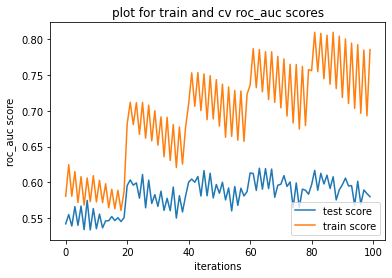

In [36]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [37]:
from sklearn.metrics import precision_score,recall_score

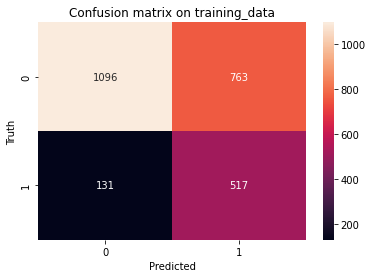

----------------------------
TP: 517
TN: 1096
FP: 763
FN: 131
F1-score: 0.5363070539419087
accuracy: 0.6433984842441165
Precision: 0.40390625
Recall: 0.7978395061728395


In [38]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

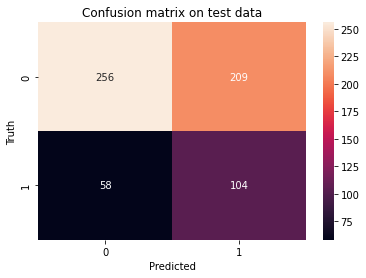

----------------------------
----------------------------
TP: 104
TN: 256
FP: 209
FN: 58
----------------------------
F1-score: 0.4378947368421052
accuracy: 0.5741626794258373
Precision: 0.33226837060702874
Recall: 0.6419753086419753


In [39]:
# on validation set
sns.heatmap(confusion_matrix(y_val,predict_y_val), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_val,predict_y_val).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_val,predict_y_val)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_val,predict_y_val)))
print('Recall: {}'.format(recall_score(y_val,predict_y_val)))

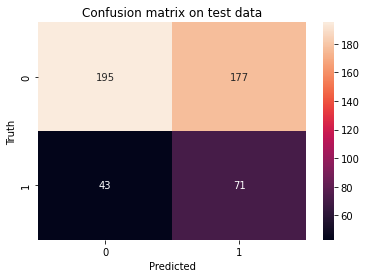

----------------------------
----------------------------
TP: 71
TN: 195
FP: 177
FN: 43
----------------------------
F1-score: 0.3922651933701658
accuracy: 0.5473251028806584
Precision: 0.2862903225806452
Recall: 0.6228070175438597


In [40]:
# on test set 
sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

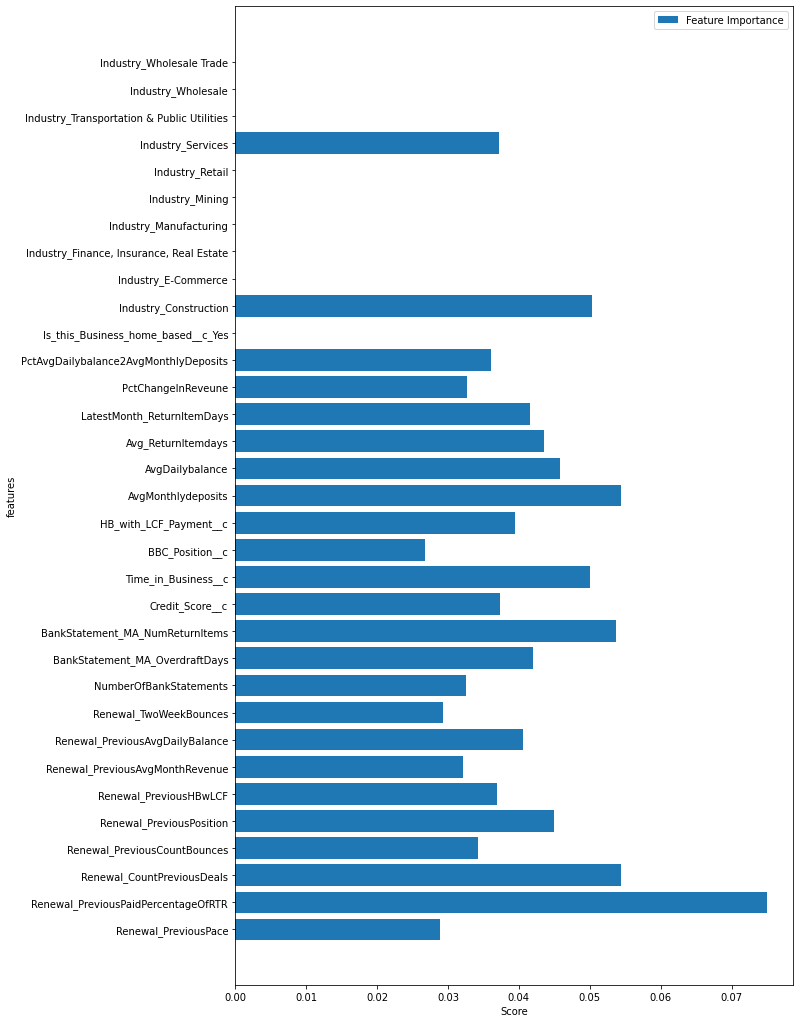

In [41]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

# For Train data

In [42]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
755,0
3123,0
221,0
543,0
1395,0
...,...
3092,0
1095,0
1130,0
1294,0


In [43]:
check['Predicted Values'] = predict_y_train

In [44]:
check

,WriteOff_YN,Predicted Values
755,0,0
3123,0,0
221,0,1
543,0,0
1395,0,0
...,...,...
3092,0,0
1095,0,0
1130,0,1
1294,0,0


In [45]:
predict_y_proba_train

array([[0.7457895 , 0.25421047],
       [0.57605493, 0.42394507],
       [0.3216995 , 0.6783005 ],
       ...,
       [0.3163523 , 0.6836477 ],
       [0.70437455, 0.29562545],
       [0.507936  , 0.49206397]], dtype=float32)

In [46]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [47]:
check['Predicted_Prob_WO = 1'] = write_off1

In [48]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
755,0,0,0.254210
3123,0,0,0.423945
221,0,1,0.678300
543,0,0,0.360998
1395,0,0,0.301261
...,...,...,...
3092,0,0,0.436350
1095,0,0,0.410349
1130,0,1,0.683648
1294,0,0,0.295625


In [49]:
check['OpportunityID'] = None

In [50]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
755,0,0,0.254210,0062M00000it89gQAA
3123,0,0,0.423945,0062M00000o7yiwQAA
221,0,1,0.678300,0062M00000ePjypQAC
543,0,0,0.360998,0062M00000ibbMMQAY
1395,0,0,0.301261,0062M00000lrPFdQAM
...,...,...,...,...
3092,0,0,0.436350,0062M00000nZiUUQA0
1095,0,0,0.410349,0062M00000ky5tQQAQ
1130,0,1,0.683648,0062M00000kypOWQAY
1294,0,0,0.295625,0062M00000lpNKnQAM


In [52]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.88027775
Min_propability_value:  0.06772216


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [53]:
check['Pentile'] = None

In [54]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.80):
    d=5
    funded_amt_d5= funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Pentile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
# funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
# gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
# advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0
# for i in check.index:
  
#   if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
#     d=10
#     funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
#     gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
#     d=9
#     funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
#     gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
#     d=8
#     funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
#     gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
#     d=7
#     funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
#     gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d7 = advanced_amt_d7+ data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
#     d=6
#     funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
#     gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
#     d=5
#     funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
#     gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
#     d=4
#     funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
#     gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
#     d=3
#     funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
#     gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
#     d=2
#     funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
#     gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
#   else:
#     d = 1
#     funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
#     gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
#   check['Decile'][i] = d

In [56]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
755,0,0,0.254210,0062M00000it89gQAA,1
3123,0,0,0.423945,0062M00000o7yiwQAA,2
221,0,1,0.678300,0062M00000ePjypQAC,5
543,0,0,0.360998,0062M00000ibbMMQAY,2
1395,0,0,0.301261,0062M00000lrPFdQAM,1
...,...,...,...,...,...
3092,0,0,0.436350,0062M00000nZiUUQA0,2
1095,0,0,0.410349,0062M00000ky5tQQAQ,2
1130,0,1,0.683648,0062M00000kypOWQAY,5
1294,0,0,0.295625,0062M00000lpNKnQAM,1


In [57]:
check['Predicted_Prob_WO = 1'].max()

0.88027775

In [58]:
check['Predicted_Prob_WO = 1'].quantile(0.8)

0.640962028503418

In [59]:
len(check[check['Pentile']==5])

502

In [60]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [61]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2453,0,0,0.067722,0062M00000n2hYqQAI,1
1820,0,0,0.071096,0062M00000lXO3FQAW,1
2113,0,0,0.079977,0062M00000mTAqHQAW,1
1836,0,0,0.083020,0062M00000lXRWJQA4,1
2872,0,0,0.092639,0062M00000nWgyTQAS,1
...,...,...,...,...,...
1348,1,1,0.864113,0062M00000lqXM7QAM,5
2363,1,1,0.865517,0062M00000n1aqqQAA,5
974,1,1,0.870590,0062M00000jzLa3QAE,5
2233,1,1,0.872344,0062M00000mymjQQAQ,5


In [62]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [63]:
exp_df = check.copy()

In [64]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2453,0,0,0.067722,0062M00000n2hYqQAI,1
1820,0,0,0.071096,0062M00000lXO3FQAW,1
2113,0,0,0.079977,0062M00000mTAqHQAW,1
1836,0,0,0.083020,0062M00000lXRWJQA4,1
2872,0,0,0.092639,0062M00000nWgyTQAS,1
...,...,...,...,...,...
1348,1,1,0.864113,0062M00000lqXM7QAM,5
2363,1,1,0.865517,0062M00000n1aqqQAA,5
974,1,1,0.870590,0062M00000jzLa3QAE,5
2233,1,1,0.872344,0062M00000mymjQQAQ,5


In [65]:
len(exp_df[exp_df['Pentile']==1])

503

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [66]:
N = len(exp_df)
N

2507

In [67]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

648

In [68]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    478
1     25
Name: WriteOff_YN, dtype: int64

In [69]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [70]:
# m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
# m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
# m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
# m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
# m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
# m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
# m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
# m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
# m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
# m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [71]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(25, 68, 107, 177, 271)

In [72]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [73]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(25, 93, 200, 377, 648)

In [74]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [75]:
# # What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# # compute response rate = rr_i = 100*m_i/n
# rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
# rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
# rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
# rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
# rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
# rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
# rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
# rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
# rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
# rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [76]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

4.970178926441352 13.6 21.357285429141715 35.32934131736527 53.98406374501992


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile 
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles, 
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [77]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [78]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

3.8580246913580245 14.351851851851851 30.864197530864196 58.17901234567901 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses 

- The value of lift in case of good model should be high.s

In [79]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)
print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.19290123456790123 0.3587962962962963 0.51440329218107 0.7272376543209876 1.0


In [80]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5]

In [81]:
max_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].max()]
max_range_dec = [round(100*i,2) for i in max_range]
max_range

[0.3609679, 0.46356672, 0.54103756, 0.64087176, 0.88027775]

In [82]:
min_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].min()]
min_range_dec = [round(100*i,2) for i in min_range]
min_range

[0.06772216, 0.3609977, 0.46379718, 0.5413707, 0.6409846]

In [83]:
avg_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].mean()]
avg_range_dec = [round(100*i,2) for i in avg_range]
avg_range_dec

[27.57, 41.5, 50.37, 58.93, 71.45]

In [84]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [85]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [86]:
no_of_opps

[503, 500, 501, 501, 502]

In [87]:
sum(no_of_opps)

2507

In [88]:
funded_amt

[8555902.79, 12255866.0, 8943437.0, 10037875.0, 15789996.85]

In [89]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.15392999, 0.22049635, 0.16090216, 0.18059229, 0.28407921])

In [90]:
gross_amt

[99520.41,
 516531.41000000003,
 501526.04999999993,
 1281877.0100000007,
 3571836.430000001]

In [91]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.016666480470201674,
 0.1031689442061402,
 0.1871584908491091,
 0.4018318242122406,
 1.0]

In [92]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.011631783628528115,
 0.04214564764334075,
 0.05607755161690074,
 0.12770402201661216,
 0.2262088120682558]

In [93]:
dict_try = {"Pentile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Pentile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,503,25,4.970179,3.858025,8555902.79,0.153930,99520.41,0.011632,0.016666,224934.32,27.57,6.77,36.10
1,2,500,68,13.600000,14.351852,12255866.00,0.220496,516531.41,0.042146,0.103169,1183974.29,41.50,36.10,46.36
2,3,501,107,21.357285,30.864198,8943437.00,0.160902,501526.05,0.056078,0.187158,1011314.07,50.37,46.38,54.10
3,4,501,177,35.329341,58.179012,10037875.00,0.180592,1281877.01,0.127704,0.401832,2721631.15,58.93,54.14,64.09
4,5,502,271,53.984064,100.000000,15789996.85,0.284079,3571836.43,0.226209,1.000000,7693171.48,71.45,64.10,88.03


In [94]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Pentile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,503,25,4.97,3.86,8555902.79,15.39,99520.41,1.16,1.67,224934.32,27.57,6.77,36.10
1,2,500,68,13.60,14.35,12255866.00,22.05,516531.41,4.21,10.32,1183974.29,41.50,36.10,46.36
2,3,501,107,21.36,30.86,8943437.00,16.09,501526.05,5.61,18.72,1011314.07,50.37,46.38,54.10
3,4,501,177,35.33,58.18,10037875.00,18.06,1281877.01,12.77,40.18,2721631.15,58.93,54.14,64.09
4,5,502,271,53.98,100.00,15789996.85,28.41,3571836.43,22.62,100.00,7693171.48,71.45,64.10,88.03


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of 
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier 
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 5 artists>

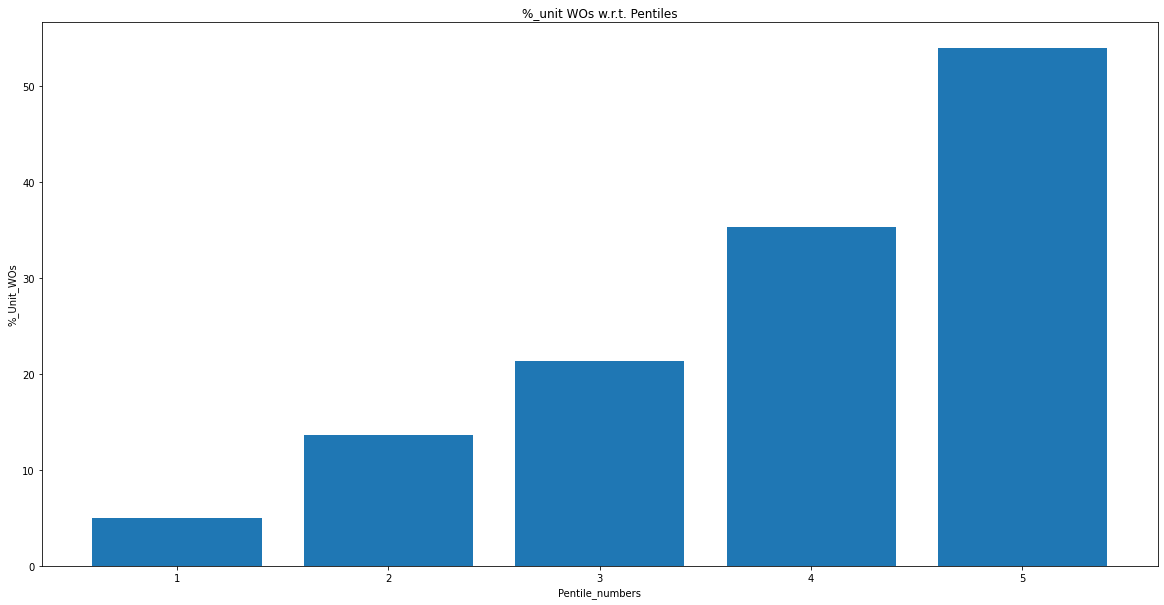

In [95]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Pentiles")
plt.bar(final_df['Pentile'],final_df['%_Unit_WO'])

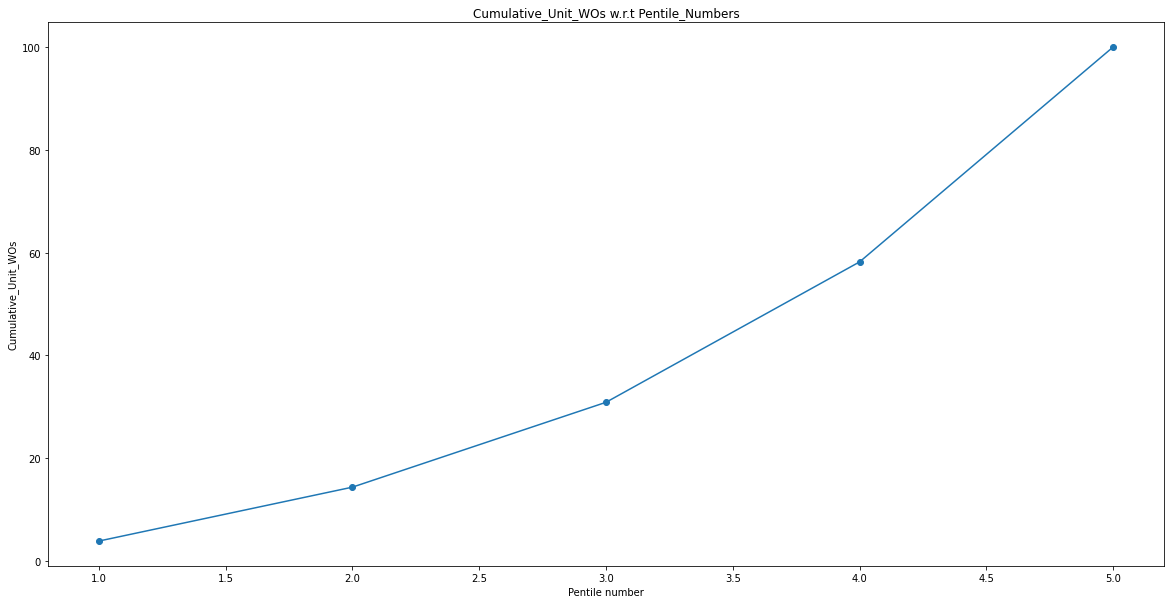

In [96]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Validation data

In [97]:
#converting this into a dataframe as y_val is a series {we get retained indexes}
check = pd.DataFrame(y_val)
check

,WriteOff_YN
1786,0
528,0
449,0
1292,1
1097,0
...,...
2684,1
1237,0
2912,1
2721,1


In [98]:
check['Predicted Values'] = predict_y_val

In [99]:
check

,WriteOff_YN,Predicted Values
1786,0,0
528,0,1
449,0,0
1292,1,1
1097,0,0
...,...,...
2684,1,1
1237,0,0
2912,1,0
2721,1,1


In [100]:
predict_y_proba_val

array([[0.50962305, 0.49037695],
       [0.27665967, 0.72334033],
       [0.64402556, 0.3559744 ],
       ...,
       [0.76059157, 0.23940843],
       [0.44070846, 0.55929154],
       [0.4004084 , 0.5995916 ]], dtype=float32)

In [101]:
write_off1 = []
for i in predict_y_proba_val:
  write_off1.append(i[1])


In [102]:
check['Predicted_Prob_WO = 1'] = write_off1

In [103]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
1786,0,0,0.490377
528,0,1,0.723340
449,0,0,0.355974
1292,1,1,0.663929
1097,0,0,0.455570
...,...,...,...
2684,1,1,0.776896
1237,0,0,0.385989
2912,1,0,0.239408
2721,1,1,0.559292


In [104]:
check['OpportunityID'] = None

In [105]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
1786,0,0,0.490377,0062M00000lXc3SQAS
528,0,1,0.723340,0062M00000iap0AQAQ
449,0,0,0.355974,0062M00000gZCzBQAW
1292,1,1,0.663929,0062M00000lpNB6QAM
1097,0,0,0.455570,0062M00000ky8eKQAQ
...,...,...,...,...
2684,1,1,0.776896,0062M00000nomOBQAY
1237,0,0,0.385989,0062M00000l0bcDQAQ
2912,1,0,0.239408,0062M00000nX2oIQAS
2721,1,1,0.559292,0062M00000npHaPQAU


In [107]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.86469656
Min_propability_value:  0.06269309


In [108]:
check['Pentile'] = None

In [109]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[4]:
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Pentile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [110]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
1786,0,0,0.490377,0062M00000lXc3SQAS,3
528,0,1,0.723340,0062M00000iap0AQAQ,5
449,0,0,0.355974,0062M00000gZCzBQAW,1
1292,1,1,0.663929,0062M00000lpNB6QAM,5
1097,0,0,0.455570,0062M00000ky8eKQAQ,2
...,...,...,...,...,...
2684,1,1,0.776896,0062M00000nomOBQAY,5
1237,0,0,0.385989,0062M00000l0bcDQAQ,2
2912,1,0,0.239408,0062M00000nX2oIQAS,1
2721,1,1,0.559292,0062M00000npHaPQAU,4


In [111]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [112]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
611,0,0,0.062693,0062M00000iDEdgQAG,1
605,0,0,0.083242,0062M00000id4PtQAI,1
527,0,0,0.103183,0062M00000iaoTZQAY,1
1720,0,0,0.131039,0062M00000lWOClQAO,1
1437,0,0,0.141410,0062M00000lsnObQAI,1
...,...,...,...,...,...
3056,1,1,0.815495,0062M00000nYySFQA0,5
1926,1,1,0.821216,0062M00000meXBHQA2,5
2715,0,1,0.823606,0062M00000npDqQQAU,5
139,0,1,0.825374,0062M00000dilozQAA,5


In [114]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [115]:
exp_df = check.copy()

In [116]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
611,0,0,0.062693,0062M00000iDEdgQAG,1
605,0,0,0.083242,0062M00000id4PtQAI,1
527,0,0,0.103183,0062M00000iaoTZQAY,1
1720,0,0,0.131039,0062M00000lWOClQAO,1
1437,0,0,0.141410,0062M00000lsnObQAI,1
...,...,...,...,...,...
3056,1,1,0.815495,0062M00000nYySFQA0,5
1926,1,1,0.821216,0062M00000meXBHQA2,5
2715,0,1,0.823606,0062M00000npDqQQAU,5
139,0,1,0.825374,0062M00000dilozQAA,5


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [117]:
N = len(exp_df)
N

627

In [118]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

162

In [120]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    106
1     13
Name: WriteOff_YN, dtype: int64

In [121]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [122]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(13, 26, 36, 37, 50)

In [123]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [124]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(13, 39, 75, 112, 162)

In [125]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [126]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

10.92436974789916 18.978102189781023 30.252100840336134 28.90625 40.32258064516129


In [127]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [129]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

8.024691358024691 24.074074074074073 46.2962962962963 69.1358024691358 100.0


In [130]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)

print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.4012345679012346 0.6018518518518519 0.7716049382716049 0.8641975308641975 1.0


In [131]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5]

In [132]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [133]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [134]:
no_of_opps

[119, 137, 119, 128, 124]

In [135]:
sum(no_of_opps)

627

In [136]:
funded_amt

[1613850.0, 2889300.0, 2672000.0, 2088866.0, 3396900.0]

In [137]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.12746708, 0.22820624, 0.21104318, 0.16498538, 0.26829812])

In [138]:
gross_amt

[100939.53,
 176267.68999999994,
 371467.83999999997,
 178807.48999999996,
 525828.53]

In [140]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.07458708606745464,
 0.20483628937701445,
 0.47932442849725276,
 0.6114503621739356,
 1.0]

In [141]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.06254579421879357,
 0.061007057072647336,
 0.13902239520958082,
 0.08560026827953539,
 0.1547965880655892]

In [142]:
dict_try = {"Decile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,119,13,10.924370,8.024691,1613850.0,0.127467,100939.53,0.062546,0.074587,207444.78,27.57,6.77,36.10
1,2,137,26,18.978102,24.074074,2889300.0,0.228206,176267.69,0.061007,0.204836,432591.46,41.50,36.10,46.36
2,3,119,36,30.252101,46.296296,2672000.0,0.211043,371467.84,0.139022,0.479324,962497.46,50.37,46.38,54.10
3,4,128,37,28.906250,69.135802,2088866.0,0.164985,178807.49,0.085600,0.611450,498203.26,58.93,54.14,64.09
4,5,124,50,40.322581,100.000000,3396900.0,0.268298,525828.53,0.154797,1.000000,980927.10,71.45,64.10,88.03


In [143]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,119,13,10.92,8.02,1613850.0,12.75,100939.53,6.25,7.46,207444.78,27.57,6.77,36.10
1,2,137,26,18.98,24.07,2889300.0,22.82,176267.69,6.10,20.48,432591.46,41.50,36.10,46.36
2,3,119,36,30.25,46.30,2672000.0,21.10,371467.84,13.90,47.93,962497.46,50.37,46.38,54.10
3,4,128,37,28.91,69.14,2088866.0,16.50,178807.49,8.56,61.15,498203.26,58.93,54.14,64.09
4,5,124,50,40.32,100.00,3396900.0,26.83,525828.53,15.48,100.00,980927.10,71.45,64.10,88.03


<BarContainer object of 5 artists>

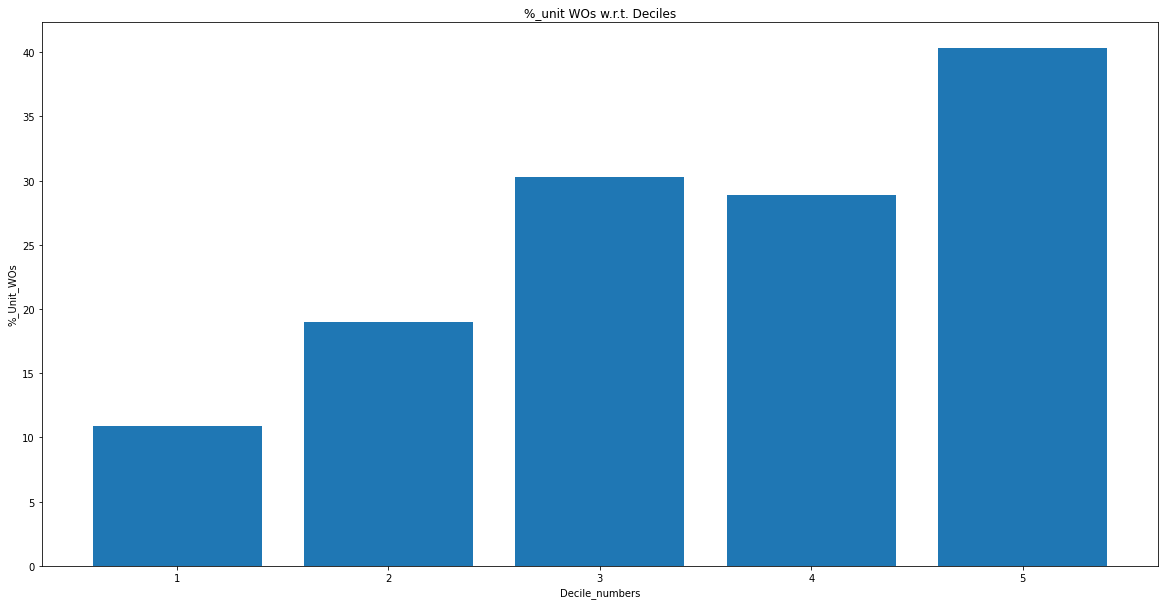

In [144]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

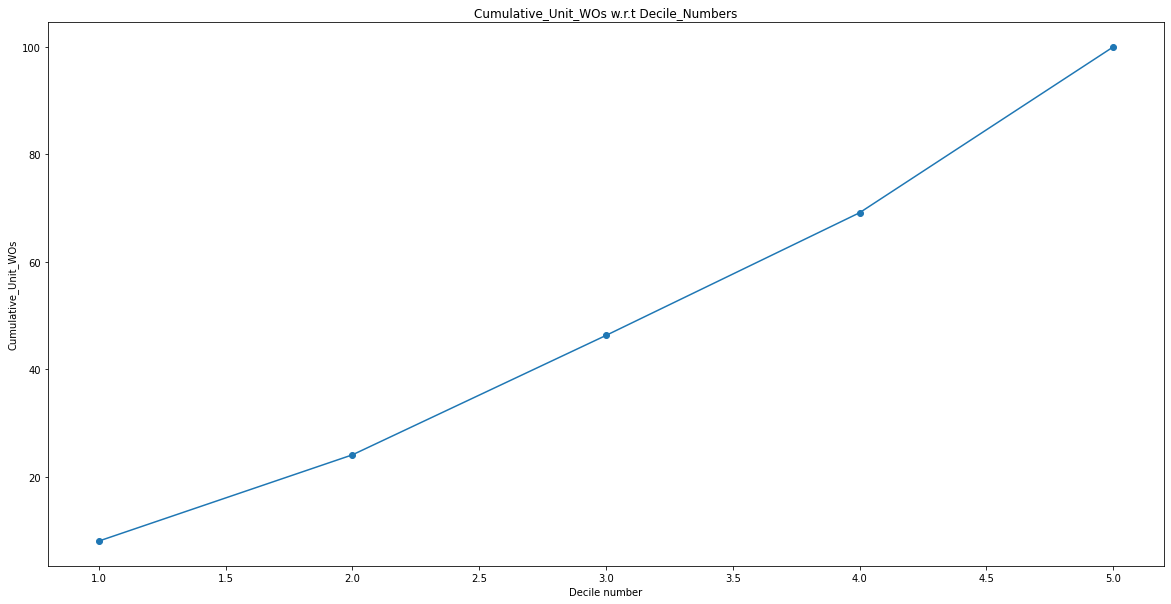

In [145]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Test Set

In [158]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
0,0
1,0
2,0
3,0
4,0
...,...
481,0
482,0
483,0
484,0


In [159]:
check['Predicted Values'] = predict_y_test

In [160]:
check

,WriteOff_YN,Predicted Values
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
481,0,1
482,0,1
483,0,1
484,0,1


In [161]:
print(predict_y_proba_test)

[[0.44616485 0.55383515]
 [0.6932886  0.30671138]
 [0.2225815  0.7774185 ]
 [0.78822064 0.21177937]
 [0.37304676 0.62695324]
 [0.26586002 0.73414   ]
 [0.53570163 0.46429834]
 [0.43983108 0.5601689 ]
 [0.24005508 0.7599449 ]
 [0.42932957 0.5706704 ]
 [0.35767204 0.64232796]
 [0.5123739  0.48762608]
 [0.5140531  0.48594692]
 [0.540426   0.459574  ]
 [0.33621573 0.66378427]
 [0.8448638  0.1551362 ]
 [0.7209916  0.2790084 ]
 [0.30918902 0.690811  ]
 [0.33518285 0.66481715]
 [0.5577638  0.44223616]
 [0.57702494 0.4229751 ]
 [0.8346989  0.16530105]
 [0.4102605  0.5897395 ]
 [0.39762533 0.6023747 ]
 [0.5405735  0.45942652]
 [0.2984367  0.7015633 ]
 [0.59101677 0.4089832 ]
 [0.42409277 0.57590723]
 [0.63165855 0.36834145]
 [0.38019323 0.61980677]
 [0.59572124 0.40427876]
 [0.5740794  0.42592058]
 [0.5393485  0.4606515 ]
 [0.34737074 0.65262926]
 [0.22788924 0.77211076]
 [0.20417571 0.7958243 ]
 [0.71787894 0.2821211 ]
 [0.54731727 0.45268276]
 [0.5643746  0.43562537]
 [0.32240397 0.67759603]


In [162]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [163]:
check['Predicted_Prob_WO = 1'] = write_off1

In [164]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
0,0,1,0.553835
1,0,0,0.306711
2,0,1,0.777418
3,0,0,0.211779
4,0,1,0.626953
...,...,...,...
481,0,1,0.706553
482,0,1,0.537832
483,0,1,0.538966
484,0,1,0.607004


In [165]:
check['OpportunityID'] = None

In [166]:
for i in check.index:
  check['OpportunityID'][i] = data_test['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [167]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
0,0,1,0.553835,0062M00000nqf6oQAA
1,0,0,0.306711,0062M00000nqfF3QAI
2,0,1,0.777418,0062M00000nqjtvQAA
3,0,0,0.211779,0062M00000nqs8FQAQ
4,0,1,0.626953,0062M00000nr94cQAA
...,...,...,...,...
481,0,1,0.706553,0062M00000oYVfWQAW
482,0,1,0.537832,0062M00000oYVWyQAO
483,0,1,0.538966,0062M00000oYYg7QAG
484,0,1,0.607004,0062M00000oYZI3QAO


In [168]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.84902894
Min_propability_value:  0.06649036


In [170]:
check['Pentile'] = None

In [171]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[4]:
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Pentile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [172]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
0,0,1,0.553835,0062M00000nqf6oQAA,4
1,0,0,0.306711,0062M00000nqfF3QAI,1
2,0,1,0.777418,0062M00000nqjtvQAA,5
3,0,0,0.211779,0062M00000nqs8FQAQ,1
4,0,1,0.626953,0062M00000nr94cQAA,4
...,...,...,...,...,...
481,0,1,0.706553,0062M00000oYVfWQAW,5
482,0,1,0.537832,0062M00000oYVWyQAO,3
483,0,1,0.538966,0062M00000oYYg7QAG,3
484,0,1,0.607004,0062M00000oYZI3QAO,4


In [173]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [174]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
357,0,0,0.066490,0062M00000oPZNNQA4,1
378,0,0,0.080783,0062M00000oQ6ltQAC,1
267,0,0,0.110868,0062M00000oOkeoQAC,1
96,0,0,0.115519,0062M00000o9M0RQAU,1
449,1,0,0.126812,0062M00000oY7tyQAC,1
...,...,...,...,...,...
172,0,1,0.830372,0062M00000oAQHGQA4,5
137,1,1,0.836792,0062M00000oAB6dQAG,5
198,0,1,0.842598,0062M00000oAZGJQA4,5
142,0,1,0.844118,0062M00000oAd2DQAS,5


In [176]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [177]:
exp_df = check.copy()

In [178]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
357,0,0,0.066490,0062M00000oPZNNQA4,1
378,0,0,0.080783,0062M00000oQ6ltQAC,1
267,0,0,0.110868,0062M00000oOkeoQAC,1
96,0,0,0.115519,0062M00000o9M0RQAU,1
449,1,0,0.126812,0062M00000oY7tyQAC,1
...,...,...,...,...,...
172,0,1,0.830372,0062M00000oAQHGQA4,5
137,1,1,0.836792,0062M00000oAB6dQAG,5
198,0,1,0.842598,0062M00000oAZGJQA4,5
142,0,1,0.844118,0062M00000oAd2DQAS,5


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [179]:
N = len(exp_df)
N

486

In [180]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

114

In [181]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    80
1    14
Name: WriteOff_YN, dtype: int64

In [182]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [183]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(14, 17, 25, 27, 31)

In [184]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [185]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(14, 31, 56, 83, 114)

In [186]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [187]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

14.893617021276595 17.346938775510203 26.595744680851062 27.551020408163264 30.392156862745097


In [188]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [189]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

12.280701754385964 27.192982456140353 49.122807017543856 72.80701754385966 100.0


In [190]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)

print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.6140350877192982 0.6798245614035088 0.8187134502923976 0.9100877192982457 1.0


In [191]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5]

In [192]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [193]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [194]:
no_of_opps

[94, 98, 94, 98, 102]

In [195]:
sum(no_of_opps)

486

In [196]:
funded_amt

[2531600.0, 2230160.0, 2635011.8499999996, 2184150.0, 1792012.0]

In [197]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.22259867, 0.19609364, 0.23169148, 0.19204807, 0.15756814])

In [198]:
gross_amt

[449892.5299999999,
 309410.67,
 241947.59999999998,
 234809.34999999998,
 205959.56]

In [199]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.31198778135979843,
 0.5265553547808303,
 0.6943391917992577,
 0.8571728537607852,
 1.0]

In [200]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.17771074814346655,
 0.13873922498834163,
 0.09182030813258013,
 0.10750605498706589,
 0.11493202054450528]

In [201]:
dict_try = {"Decile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,94,14,14.893617,12.280702,2531600.00,0.222599,449892.53,0.177711,0.311988,1057499.73,27.57,6.77,36.10
1,2,98,17,17.346939,27.192982,2230160.00,0.196094,309410.67,0.138739,0.526555,639187.85,41.50,36.10,46.36
2,3,94,25,26.595745,49.122807,2635011.85,0.231691,241947.60,0.091820,0.694339,447917.33,50.37,46.38,54.10
3,4,98,27,27.551020,72.807018,2184150.00,0.192048,234809.35,0.107506,0.857173,751451.53,58.93,54.14,64.09
4,5,102,31,30.392157,100.000000,1792012.00,0.157568,205959.56,0.114932,1.000000,396982.56,71.45,64.10,88.03


In [202]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,94,14,14.89,12.28,2531600.00,22.26,449892.53,17.77,31.20,1057499.73,27.57,6.77,36.10
1,2,98,17,17.35,27.19,2230160.00,19.61,309410.67,13.87,52.66,639187.85,41.50,36.10,46.36
2,3,94,25,26.60,49.12,2635011.85,23.17,241947.60,9.18,69.43,447917.33,50.37,46.38,54.10
3,4,98,27,27.55,72.81,2184150.00,19.20,234809.35,10.75,85.72,751451.53,58.93,54.14,64.09
4,5,102,31,30.39,100.00,1792012.00,15.76,205959.56,11.49,100.00,396982.56,71.45,64.10,88.03


<BarContainer object of 5 artists>

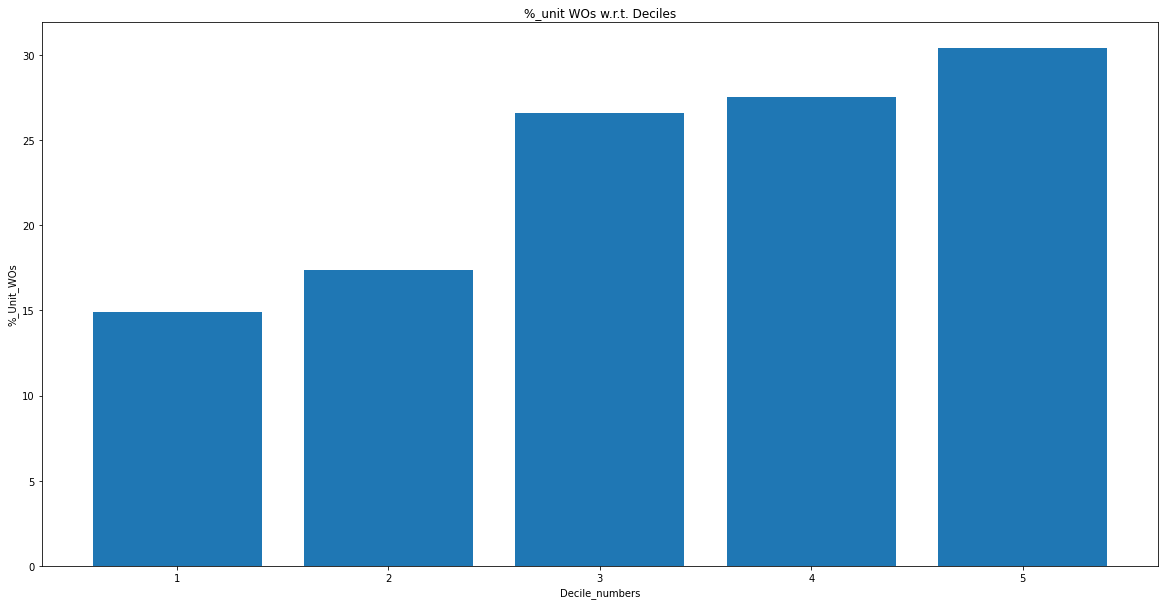

In [203]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

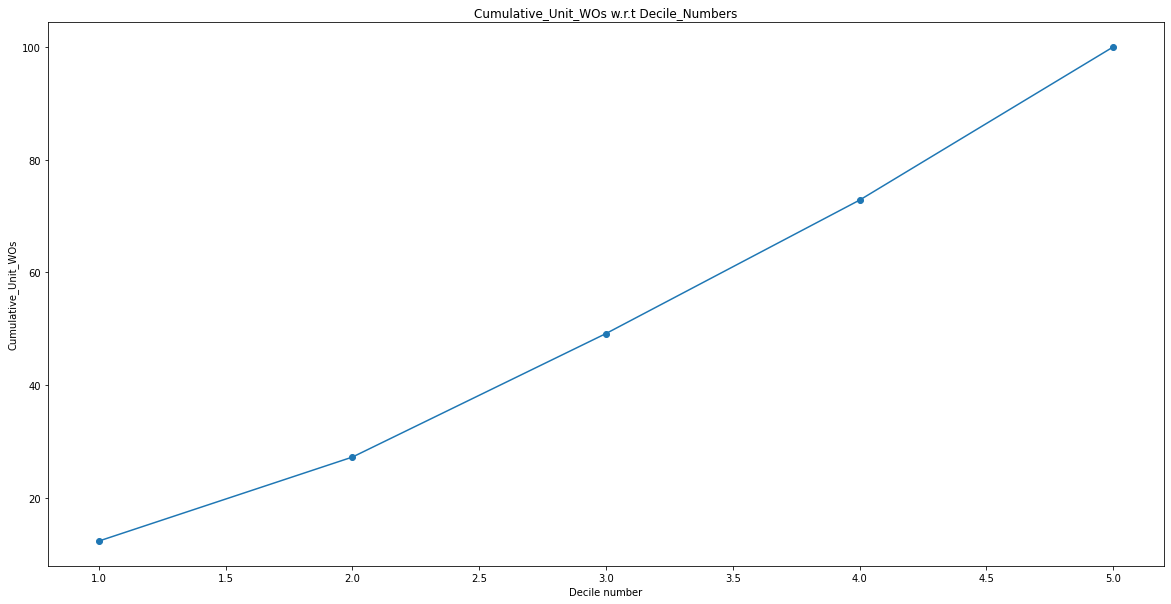

In [204]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}